# Logistic Regreesion（逻辑回归）

* 选用kernel learning_dl
~~~
conda activate learning_dl 

# conda remove --name learning_dl --all
~~~

In [4]:
import pandas as pd
import seaborn as sns
# sns.set(context="notebook", style="whitegrid", palette="dark")
import matplotlib.pyplot as plt
# import tensorflow as tf
import numpy as np

print("finish import module!!!")

finish import module!!!


In [5]:
#读入数据并查看数据的形式
data = pd.read_csv('ex2data1.txt', names=['exam1', 'exam2', 'admitted'])
print(data)

        exam1      exam2  admitted
0   34.623660  78.024693         0
1   30.286711  43.894998         0
2   35.847409  72.902198         0
3   60.182599  86.308552         1
4   79.032736  75.344376         1
..        ...        ...       ...
95  83.489163  48.380286         1
96  42.261701  87.103851         1
97  99.315009  68.775409         1
98  55.340018  64.931938         1
99  74.775893  89.529813         1

[100 rows x 3 columns]


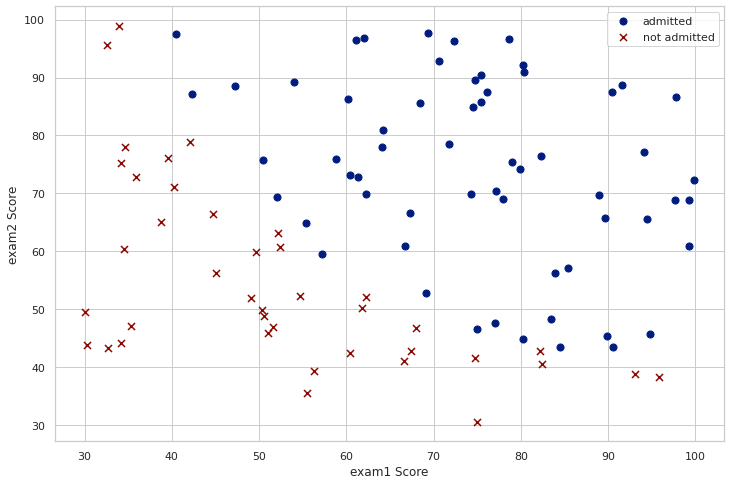

In [6]:
# 把数据以散点图的形式画出来（正样本为被接纳，负样本就是不被接纳）
positive = data[data['admitted'].isin([1])]
negative = data[data['admitted'].isin([0])]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positive['exam1'], positive['exam2'], s=50, c='b', marker='o', label='admitted')
ax.scatter(negative['exam1'], negative['exam2'], s=50, c='r', marker='x', label='not admitted')
ax.legend()
ax.set_xlabel('exam1 Score')
ax.set_ylabel('exam2 Score')
plt.show()

# 定义sigmoid 函数
g 代表一个常用的逻辑函数（logistic function）为S形函数（Sigmoid function），公式为： 
$$g\left( z \right)=\frac{1}{1+{{e}^{-z}}}$$

并有：$$z={{\theta }^{T}}X={{\theta }_{0}}{{x}_{0}}+{{\theta }_{1}}{{x}_{1}}+{{\theta }_{2}}{{x}_{2}}+...+{{\theta }_{n}}{{x}_{n}}$$
合起来，我们得到逻辑回归模型的假设函数： 
	$${{h}_{\theta }}\left( x \right)=\frac{1}{1+{{e}^{-{{\theta }^{T}}X}}} $$

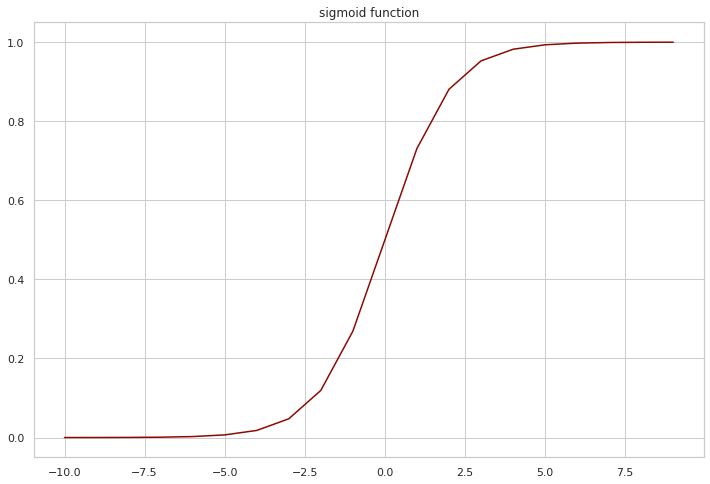

In [8]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# 画出sigmoid函数
nums = np.arange(-10, 10, step=1)#生成-10到10的等差数列

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(nums, sigmoid(nums), 'r')
ax.title.set_text('sigmoid function')
plt.show()